In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [5]:
df = pd.read_csv('ratings.csv')
#df = df.drop('number of years after 1970 ', 1)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['timestamp'].dt.strftime("%Y,%b,%d")
del df['timestamp.1']
df2 = pd.read_csv('tags.csv')
del df2['timestampForTag']
del df2['userId']
df2.drop(df2[df2['tag'] !='christmas'.casefold()].index, inplace=True)
df2 = df2.movieId.unique()

In [6]:
df2 = pd.DataFrame({'movieId':df2})

In [7]:
df3 = pd.merge(df,df2)

In [8]:
df3["mth_day"] = df3['timestamp'].map(lambda x: x.strftime("%m-%d"))
df3 = df3.sort_values(by=['mth_day'])

In [9]:
dates = pd.date_range(start='2016-01-01',end='2016-12-31')

In [10]:
df4 = pd.DataFrame({'dates':dates})

In [11]:
df4["mth_day1"] = df4['dates'].map(lambda x: x.strftime("%m-%d"))

In [12]:
df4['no_ratings']=0
del df4['dates']

In [13]:
i = 0
count = 0
for t in df4.mth_day1:
    count = 0
    #print(t)
    for s in df3.mth_day:
        if t == s:
            count +=1
    #print(df4.loc[i])        
    df4.loc[i] = [t,count]
    i+=1
           

In [18]:
df4.head()

,mth_day1,no_ratings,MA
0,01-01,41,NaN
1,01-02,52,NaN
2,01-03,71,NaN
3,01-04,58,NaN
4,01-05,56,NaN


In [19]:
df4['MA'] = df4['no_ratings'].rolling(window=30,center=True).mean()
df4.dtypes

mth_day1       object
no_ratings      int64
MA            float64
dtype: object

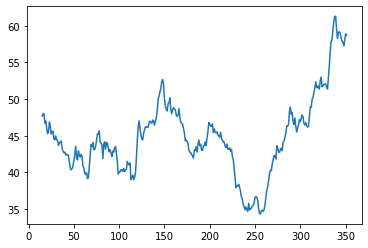

In [17]:
df4['MA'].plot(x='mth_day1',y = 'MA')